# **IS 362 – Final Project**
# Correlation Between Sales and Reviews of Software Titles on Nintendo Switch

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests, time, datetime, re, random
from IPython.display import Image
import seaborn as sns
import matplotlib as plt

# This sets the size of the seaborn diagrams generated
sns.set(rc={'figure.figsize' : (20, 10)})

# This disables the scientific notation that would be automatically assigned to large numbers
pd.options.display.float_format = '{:.0f}'.format

## Proposal and Project Explanation

I chose the topic of video games because I am a gamer in my free time. So far, I am fully invested in **Nintendo Switch** games and I desire to understand if there is a correlation between the sales performance of each title and their ratings. My hypothesis is that a majority of best-selling Switch games with high review scores from professional critics have a correlation, in which games with higher professional review scores are more likely to have more copies sold. Based on the sales performance and criticism, game developers can make use of it as constructive criticism to give them direction on what their next project should be.

This project will make use of a data I web scraped from a Wikipedia page and a CSV I created. The DataFrame with the web scraped data from Wikipedia will list 96 Nintendo Switch game titles, each of them are ranked in order (though rank number won't be initally shown by default), showing the number of copies (physical and digital) sold and the date this was last recorded from the developer's latest published financial data. However, the table I will scrape the data from will mostly contain Nintendo titles because the company shares the sales of their video games every quarter while most other publishers do not share sales figures per console.

The CSV will contain review scores from Metacritic, in which the MetaScores are from professional critics, these scores are what would really matter the most. These scores were entered manually into the CSV file. Though, it should be noted that not all titles will have a crtic score. Also, 'User Scores' – not listed – are also available on the Metacritic, but they should be "taken with a grain of salt" because they are mostly based on opinions from gaming communities. Some of the reviews may be **purposefully** be bad, these people would troll the game, and give it bad impression, despite what professionals and more honest reviewers would say otherwise. Since 'User Scores' are mostly biased, they will be ignored in this project.

### Figure 1:
#### The Nintendo Switch console, released in 2017 as a sucessor to the Wii U

In [2]:
Image(url="https://assets.nintendo.com/image/upload/f_auto/q_auto/c_fill,w_300/ncom/en_US/switch/system/three-modes-in-one", width=900, height=684)

### Figure 2:
#### Example of first-party Nintendo Switch titles, all of them featured in the Data Source

In [3]:
Image(url="https://assets.nintendo.com/image/upload/f_auto/q_auto/dpr_1.5/c_scale,w_400/ncom/en_US/articles/2022/december-games-sale/IS-3221-1920x1080-PLPSoftwareSales_v01", width=1200, height=676)

### Figure 3:
#### Nintendo 2023 Fiscal Year Data

In [4]:
Image(url="https://www.videogameschronicle.com/files/2023/05/Screenshot-2023-05-09-085217-768x431.jpg", width=1271, height=713)

These three supplementary images complement the topic of the report/assignment, especially the third one (above). The sales figures shown are from Nintendo's 2023 fiscal year report, in which there is a high sales performance of first-party software titles from Nintendo.

I could have embedded the images in a markdown cell or from the "Edit" menu, but I wanted to do it in Python code. Perhaps it fulfills the criteria of "a feature not done in class."

## Web Scraping Nintendo Switch Sales Data

### Source: https://en.wikipedia.org/wiki/List_of_best-selling_Nintendo_Switch_video_games

In [5]:
# These objects are to help extract the data from the URL, depending on the web browser and operating system of
# the PC you are using, you would have to change the 'User-Agent' expression below. To do this, type in the Google
# search bar "What is my user agent?", and the browser will tell you. Copy and paste it below if necessary to
# replace it as 'User-Agent' : "[Insert what your user agent is]"
wiki_url = "https://en.wikipedia.org/wiki/List_of_best-selling_Nintendo_Switch_video_games"
headers = {'User-Agent' : "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:90.0) Gecko/20100101 Firefox/90.0"}

# This is to test if the code is able to retrieve the code on the HTML page. Level 200 means "OK"
response = requests.get(wiki_url, headers=headers)
response.status_code

200

In [6]:
# parse data from the HTML page into a BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')
soup

# search for the table of Nintendo Switch sales
html_table = soup.find('table', {'class' : "wikitable"})
html_table

# create the DataFrame with the scraped data
switch_games_sales = pd.read_html(str(html_table))[0]
switch_games_sales

,Title,Copies sold,As of,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Mario Kart 8 Deluxe,64.27 million[4],"September 30, 2024","April 28, 2017",Kart racing,Nintendo EPD,Nintendo
1,Animal Crossing: New Horizons,46.45 million[4],"September 30, 2024","March 20, 2020",Social simulation,Nintendo EPD,Nintendo
2,Super Smash Bros. Ultimate,35.14 million[4],"September 30, 2024","December 7, 2018",Fighting,Bandai Namco StudiosSora Ltd.,Nintendo
3,The Legend of Zelda: Breath of the Wild,32.29 million[4],"September 30, 2024","March 3, 2017",Action-adventure,Nintendo EPD,Nintendo
4,Super Mario Odyssey,28.50 million[4],"September 30, 2024","October 27, 2017",Platformer,Nintendo EPD,Nintendo
...,...,...,...,...,...,...,...
91,Fitness Boxing,1 million[43],"September 8, 2020","December 20, 2018",Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo
92,Fitness Boxing 2: Rhythm and Exercise,1 million[44],"December 9, 2021","December 4, 2020",Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo
93,Resident Evil 6,1 million[33],"March 31, 2024","October 29, 2019",Survival horror,Capcom,Capcom
94,Story of Seasons: Pioneers of Olive Town,1 million[45],"November 18, 2021","February 25, 2021",Simulationrole-playing,Marvelous,Xseed Games


The cell below is to help correct certain data formats in the DataFrame. When performing certain functions, such as sort_values, they may not read the values in the DataFrame the way you want it to. This is because they will prioritize the first character in the string of text in them, plus the data type in those columns are *recognized* as strings. To fix this, the functions below will parse the strings and convert them to the correct format.

In [7]:
def copies_sold_to_numeric(value):
    parsed_string = re.sub(r'million(\[[a-z]*[0-9]*\])*', '', value)
    return float(parsed_string) * 1000000

def convert_date(date):
               #  Month day, Year
    format_type = '%B %d, %Y'  # This is the current format
    datetime_str = datetime.datetime.strptime(date, format_type)
    return datetime_str.strftime("%m/%d/%Y") # mm/dd/yyyy

The cell below is to convert the formats using the functions from above.

In [8]:
switch_game_sales = switch_games_sales.assign(
    as_of = lambda df: df['As of'].map(lambda var:  convert_date(var)),
    release_date = lambda df: df['Release date[a]'].map(lambda var:  convert_date(var)),
    copies_sold = lambda df: df['Copies sold'].map(lambda var: copies_sold_to_numeric(var))
).drop(columns = ['Release date[a]', 'As of', 'Copies sold'], axis=1)

# Since the original columns with unformatted data were removed, I had to fix the new
# formatted ones with the correct header text as the original Wikipedia page, as well
# as put the columns back in the original order
switch_game_sales.rename(columns = {'as_of' : 'As of', 'release_date' : "Release date", "copies_sold" : "Copies sold"}, inplace=True)
switch_game_sales = switch_game_sales[['Title', 'Copies sold', 'As of', 'Release date', 'Genre(s)', 'Developer(s)', 'Publisher(s)']]

switch_game_sales

,Title,Copies sold,As of,Release date,Genre(s),Developer(s),Publisher(s)
0,Mario Kart 8 Deluxe,64270000,09/30/2024,04/28/2017,Kart racing,Nintendo EPD,Nintendo
1,Animal Crossing: New Horizons,46450000,09/30/2024,03/20/2020,Social simulation,Nintendo EPD,Nintendo
2,Super Smash Bros. Ultimate,35140000,09/30/2024,12/07/2018,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo
3,The Legend of Zelda: Breath of the Wild,32290000,09/30/2024,03/03/2017,Action-adventure,Nintendo EPD,Nintendo
4,Super Mario Odyssey,28500000,09/30/2024,10/27/2017,Platformer,Nintendo EPD,Nintendo
...,...,...,...,...,...,...,...
91,Fitness Boxing,1000000,09/08/2020,12/20/2018,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo
92,Fitness Boxing 2: Rhythm and Exercise,1000000,12/09/2021,12/04/2020,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo
93,Resident Evil 6,1000000,03/31/2024,10/29/2019,Survival horror,Capcom,Capcom
94,Story of Seasons: Pioneers of Olive Town,1000000,11/18/2021,02/25/2021,Simulationrole-playing,Marvelous,Xseed Games


## Importing Critic Review Data from CSV

This will serve as a Relational Database file for my project.

In [9]:
switch_game_reviews = pd.read_csv('SwitchGame_ReviewScores.csv')
switch_game_reviews

,Title,Metacritic Critic Score (MetaScore),Note
0,Mario Kart 8 Deluxe,92,Enhanced port of Wii U version
1,Animal Crossing: New Horizons,90,NaN
2,Super Smash Bros. Ultimate,93,NaN
3,The Legend of Zelda: Breath of the Wild,97,NaN
4,Super Mario Odyssey,97,NaN
...,...,...,...
91,Fitness Boxing,66,NaN
92,Fitness Boxing 2: Rhythm and Exercise,66,NaN
93,Resident Evil 6,69,Port of 2011 PS3 and Xbox 360 title
94,Story of Seasons: Pioneers of Olive Town,71,NaN


## Merging the two DataFrames

The code cell below will merge the two DataFrames together based on the game title.

In [10]:
switch_game_sales_and_reviews = pd.merge(switch_game_sales, switch_game_reviews, on='Title')
switch_game_sales_and_reviews

,Title,Copies sold,As of,Release date,Genre(s),Developer(s),Publisher(s),Metacritic Critic Score (MetaScore),Note
0,Mario Kart 8 Deluxe,64270000,09/30/2024,04/28/2017,Kart racing,Nintendo EPD,Nintendo,92,Enhanced port of Wii U version
1,Animal Crossing: New Horizons,46450000,09/30/2024,03/20/2020,Social simulation,Nintendo EPD,Nintendo,90,NaN
2,Super Smash Bros. Ultimate,35140000,09/30/2024,12/07/2018,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,93,NaN
3,The Legend of Zelda: Breath of the Wild,32290000,09/30/2024,03/03/2017,Action-adventure,Nintendo EPD,Nintendo,97,NaN
4,Super Mario Odyssey,28500000,09/30/2024,10/27/2017,Platformer,Nintendo EPD,Nintendo,97,NaN
...,...,...,...,...,...,...,...,...,...
91,Fitness Boxing,1000000,09/08/2020,12/20/2018,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,66,NaN
92,Fitness Boxing 2: Rhythm and Exercise,1000000,12/09/2021,12/04/2020,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,66,NaN
93,Resident Evil 6,1000000,03/31/2024,10/29/2019,Survival horror,Capcom,Capcom,69,Port of 2011 PS3 and Xbox 360 title
94,Story of Seasons: Pioneers of Olive Town,1000000,11/18/2021,02/25/2021,Simulationrole-playing,Marvelous,Xseed Games,71,NaN


## Ranking by Metacritic Reviews (and Copies Sold)

I chose to assign ranks based on the Metacritic Review score, and apparently many of the game titles can share the same rank as long as they have the same score. However, those that do not have ranks are due to lacking a critic score. However, I will not sort the DataFrame or set the new column as the index because they are ***already*** assigned a rank on the Wikipedia page based on the descedning values of the number of copies sold for each title by default. This order is preserved in the DataFrame.

I am hoping this fulfills the criteria required for "a feature not done in class."

### Default Ranking

In [11]:
switch_game_sales_and_reviews['Rank by Copies Sold'] = switch_game_sales_and_reviews['Copies sold'].rank(ascending = 0)
switch_game_sales_and_reviews['Rank by Reviews'] = switch_game_sales_and_reviews['Metacritic Critic Score (MetaScore)'].rank(ascending = 0)
switch_game_sales_and_reviews.sort_values("Rank by Copies Sold")

,Title,Copies sold,As of,Release date,Genre(s),Developer(s),Publisher(s),Metacritic Critic Score (MetaScore),Note,Rank by Copies Sold,Rank by Reviews
0,Mario Kart 8 Deluxe,64270000,09/30/2024,04/28/2017,Kart racing,Nintendo EPD,Nintendo,92,Enhanced port of Wii U version,1,8
1,Animal Crossing: New Horizons,46450000,09/30/2024,03/20/2020,Social simulation,Nintendo EPD,Nintendo,90,NaN,2,10
2,Super Smash Bros. Ultimate,35140000,09/30/2024,12/07/2018,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,93,NaN,3,6
3,The Legend of Zelda: Breath of the Wild,32290000,09/30/2024,03/03/2017,Action-adventure,Nintendo EPD,Nintendo,97,NaN,4,2
4,Super Mario Odyssey,28500000,09/30/2024,10/27/2017,Platformer,Nintendo EPD,Nintendo,97,NaN,5,2
...,...,...,...,...,...,...,...,...,...,...,...
90,Fire Emblem Warriors: Three Hopes,1000000,08/17/2022,06/24/2022,Hack and slashRole-playing,Omega Force,JP: Koei TecmoNA/PAL: Nintendo,80,NaN,92,51
91,Fitness Boxing,1000000,09/08/2020,12/20/2018,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,66,NaN,92,88
92,Fitness Boxing 2: Rhythm and Exercise,1000000,12/09/2021,12/04/2020,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,66,NaN,92,88
93,Resident Evil 6,1000000,03/31/2024,10/29/2019,Survival horror,Capcom,Capcom,69,Port of 2011 PS3 and Xbox 360 title,92,86


### Ranking by Both Reviews and Copies Sold

Here, I ranked the dataset by both "Copies sold" and the titles' "review score." 

Though, it should be noted that the first two titles shown have the same Metascore, thus they have the same placement in "Rank by Reviews," and neither of them can be "1."

In [12]:
switch_game_sales_and_reviews.sort_values("Rank by Copies Sold")
switch_game_sales_and_reviews.sort_values("Rank by Reviews")

,Title,Copies sold,As of,Release date,Genre(s),Developer(s),Publisher(s),Metacritic Critic Score (MetaScore),Note,Rank by Copies Sold,Rank by Reviews
3,The Legend of Zelda: Breath of the Wild,32290000,09/30/2024,03/03/2017,Action-adventure,Nintendo EPD,Nintendo,97,NaN,4,2
4,Super Mario Odyssey,28500000,09/30/2024,10/27/2017,Platformer,Nintendo EPD,Nintendo,97,NaN,5,2
7,The Legend of Zelda: Tears of the Kingdom,21040000,09/30/2024,05/12/2023,Action-adventure,Nintendo EPD,Nintendo,96,NaN,8,3
85,Metroid Prime Remastered,1090000,03/31/2023,02/08/2023,Action-adventure,Retro Studios,Nintendo,94,HD remaster of 2002 GameCube title; GameCube v...,86,4
2,Super Smash Bros. Ultimate,35140000,09/30/2024,12/07/2018,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,93,NaN,3,6
...,...,...,...,...,...,...,...,...,...,...,...
36,1-2-Switch,3740000,12/31/2022,03/03/2017,Party,Nintendo EPD,Nintendo,58,NaN,37,92
25,Suika Game,7400000,04/11/2024,12/09/2021,Puzzle,Aladdin X,Aladdin X,NaN,"No critic score (MetaScore) given, User Score ...",26,NaN
35,"Momotaro Dentetsu: Showa, Heisei, Reiwa Mo Tei...",4000000,07/19/2023,11/19/2020,Board game,Konami,JP: Konami,NaN,No reviews available; Japanese region-exclusiv...,36,NaN
83,Momotaro Dentetsu World: Chikyuu wa Kibou de M...,1120000,08/18/2024,11/16/2023,Board game,Konami,JP: Konami,NaN,No reviews available; Japanese region-exclusiv...,84,NaN


#### Observation:

When ranking both factors simultaneously, it seems that the highest rated game in the dataset with the most copies sold is ***The Legend of Zelda: Breath of the Wild***. It holds this distintion with a Metacritic review score of **97** and least **32,290,000** copies sold.

Though, it should be noted that it shares the review ranking with ***Super Mario Odyssey***, it cannot thus have a ranking of 1.

## Exporting the Merged DataFrame as a CSV

This is to store the merged DataFrame as an independent CSV file, which can then be imported into an Excel file or for other purposes with ease.

Note: I had to convert the code lines into comments because once they had accomplished their purpose, there was no need for executing this code cell again. But it will be retained for potential future use.

In [13]:
# switch_game_sales_and_reviews.to_csv('Switch_GameSales_and_Reviews.csv', index=False)
# print('Done')

### Analyzing the Correlation Between Sales Performance and Review Score

In [14]:
sales_by_score = switch_game_sales_and_reviews.groupby('Copies sold').mean('Metacritic Critic Score (MetaScore)')
sales_by_score

,Metacritic Critic Score (MetaScore),Rank by Copies Sold,Rank by Reviews
Copies sold,,,
1000000,73,92,71
1020000,69,88,86
1070000,86,87,26
1090000,94,86,4
1100000,84,85,34
...,...,...,...
28500000,97,5,2
32290000,97,4,2
35140000,93,3,6


<AxesSubplot:title={'center':'Nintendo Switch Title Sales by Review Score Average'}, xlabel='Metacritic Critic Score (MetaScore)', ylabel='Copies of Switch Titles Sold (in ten millions)'>

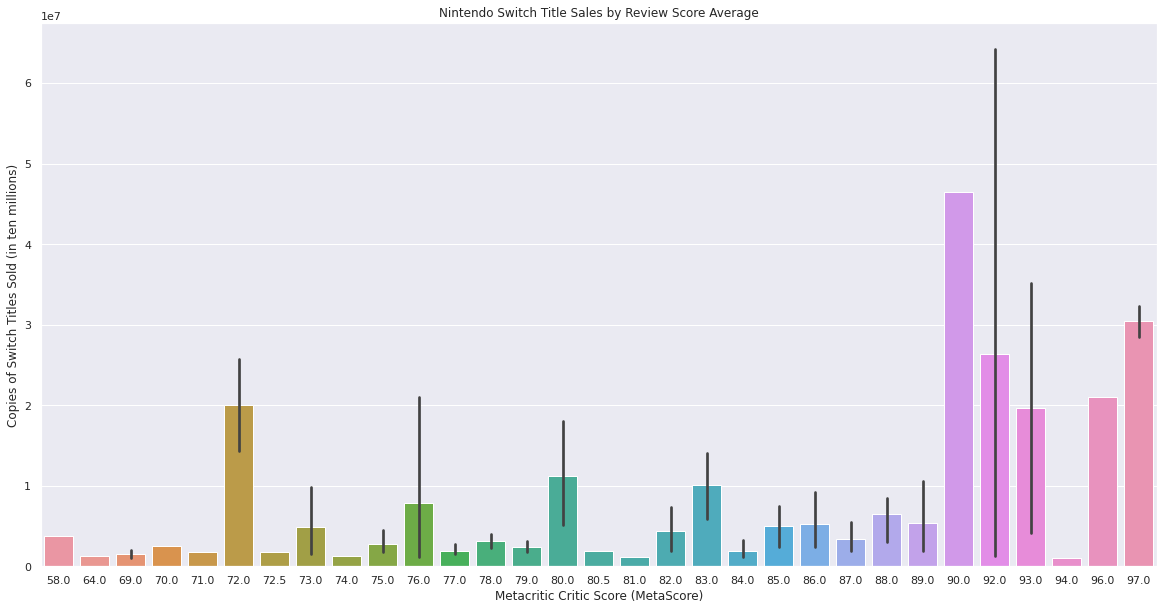

In [15]:
switch_sales_by_review_avg = sns.barplot(data=sales_by_score, x=sales_by_score['Metacritic Critic Score (MetaScore)'], 
                                         y=sales_by_score.index)
switch_sales_by_review_avg.set(ylabel = 'Copies of Switch Titles Sold (in ten millions)', title = 'Nintendo Switch Title Sales by Review Score Average')
switch_sales_by_review_avg

#### Observation:

On average, Nintendo Switch software titles (and possibly most games in general, regardless of platform, developer, and publisher) with an average aggregated score (such as from Metacritic) of at least 90, are more likely to have a higher sales performance compared to game titles with a score less than that. The black line reprsent the margin or error, or rather the range reprsenting the titles that sold the least and the most copies with their respective aggregated review score.

### Analyzing the Correlation Between Title Genres and Sales Performance

In [16]:
sales_by_genre = switch_game_sales_and_reviews.groupby('Genre(s)').mean('Copies sold')
sales_by_genre

,Copies sold,Metacritic Critic Score (MetaScore),Rank by Copies Sold,Rank by Reviews
Genre(s),,,,
Action puzzle,2350000,82,53,44
Action role-playing,5148333,84,46,32
Action role-playing game,1150000,83,82,39
Action-Adventure,1570000,77,69,64
Action-adventure,9581111,89,38,20
Action-adventurehack and slash,1217500,87,80,22
Board game,2560000,NaN,60,NaN
Bullet hell,1000000,87,92,21
Construction kit,1420000,77,73,64


<AxesSubplot:title={'center':'Average Nintendo Switch Title Sales by Genre'}, xlabel='Switch Game Genre(s)', ylabel='Copies of Switch Titles Sold (in ten millions); Average Cumulative by Genre'>

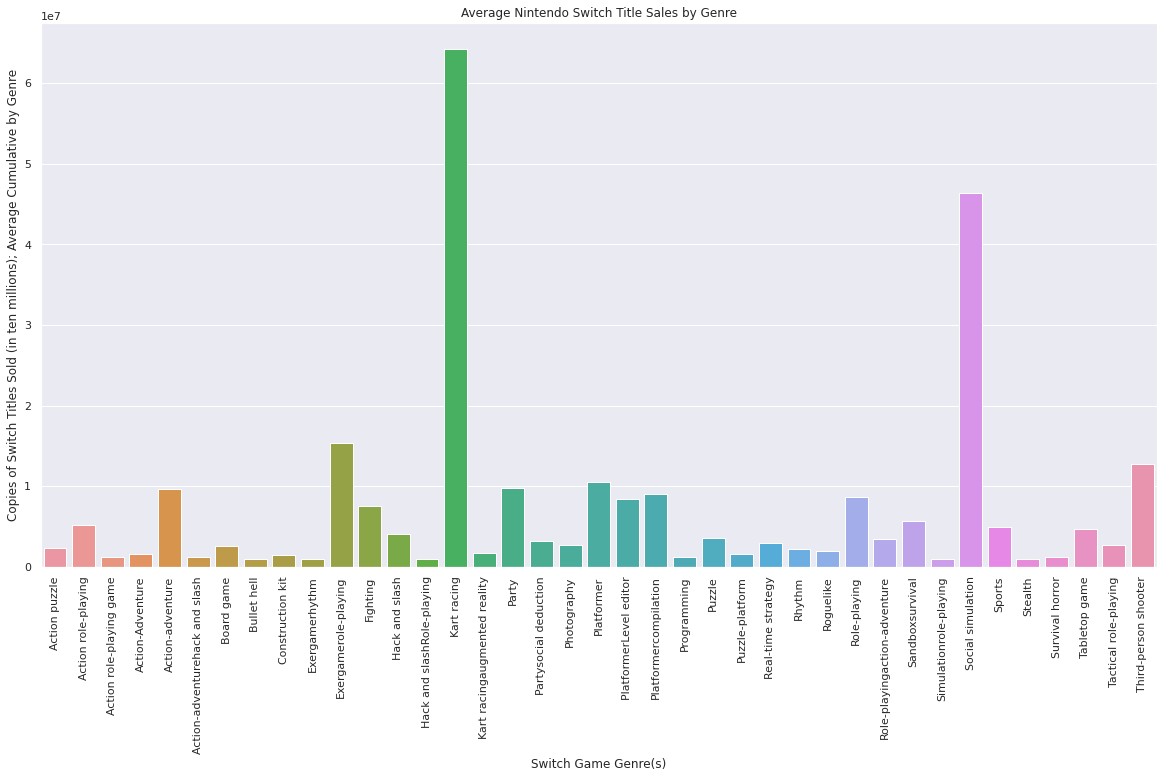

In [17]:
switch_sales_by_genre_avg = sns.barplot(data=sales_by_genre, x=sales_by_genre.index, 
                                         y=sales_by_genre['Copies sold'])
switch_sales_by_genre_avg.set(xlabel = 'Switch Game Genre(s)', ylabel = 'Copies of Switch Titles Sold (in ten millions); Average Cumulative by Genre', title = 'Average Nintendo Switch Title Sales by Genre')
switch_sales_by_genre_avg.set_xticklabels(switch_sales_by_genre_avg.get_xticklabels(), rotation=90)

switch_sales_by_genre_avg

#### Observation:

On average, a majority of Nintendo Switch titles that had the most copies sold are the ones that are in the Kart racing genre, plus the category that is listed as "Kart racingaugmented reality". Though, considering that the only titles in those categories are ***Mario Kart*** titles, it does not serve as a good comparison to other genres and their titles. Especially since some of the other categories are part of the same genre, though they are listed separatedly because they are subgenres, have a spelling error, or have additonal description (e.g., Action puzzle, Action role-playing, Action role-playing game, Action-Adventure, Action-adventure, Action-adventurehack and slash, and Role-playingaction-adventure are all subgenres of the **Action** genre). Though, when their sales are totaled together, they would still be significantly less than the **Mario Kart** sales.

Social simulation appears to be the genre that the second highest, though the only title in that genre in the dataset is ***Animal Crossing: New Horizons***, a Nintendo title. Like with **Mario Kart**, it might not be a good comparison when estimating or perceiving the sales performance of titles of the same genre not produced by Nintendo.

It should be noted that some of the genres here are represented by a few number of titles (e.g., given how 'Kart racing' is primarily represented by *one* title), meaning that they may not reflect the sales performance of titles of the same genre whether or not they are developed for the Nintendo Switch.

The data shown here, despite being a mess due to how the strings parsed the text for each category (along with spelling and grammar format errors present), still provide a sense of clarity and understanding of the sales performance of best-selling Nintendo Switch titles based on their respective genres and genres related to it.

Furthermore, this does not reflect the popularity of genres and their attribution to a game's sales performance due to the dataset being a biased and small sample size. Many people have their preferences, but reviews from critics may be the more impactful factor when it comes to a title's sales performance. Thus, these results wholly represent the sales performance of this particular dataset *only*, as these are software titles that *are* available for the Nintendo Switch.

## Conclusion

The merged dataset has shown that there is a correlation between the aggregated ratings of Nintendo Switch game titles and the number of copies (physical and digital) sold to consumers. In general, Nintendo Switch titles with a Metacritic score of at least <u>90</u> are expected to have a high sales performance, with the cumulative sales of both digital and physical copies reaching millions. Among these best-selling titles, it is shown that <u>Kart racing</u> is the most popular genre among them, though this is only represented by one title, ***Mario Kart 8 Deluxe***, considering that it is the highest selling Switch game recorded as of recently (financial data as of September 30, 2024), with at least 64,270,000 copies sold. Though, this is also considering the fact that the series is renowned for popularizing the kart racing genre (which is a subgenre of racing games as a whole), in which the first entry, *Super Mario Kart* (1992), did so and enabled the *Mario Kart* series to be the foremost franchise in the subgenre.

Additionally, ***Mario Kart 8 Deluxe*** has an aggregated, Metacritic score of 92, falling within the expected parameters of the correlation of having a high-sales performance being attributed with a minimum aggregated rating of 90, given that it is a 'best-selling Switch title." However, other factors that may attribute to its sales performance would be how it's part of the larger ***Super Mario*** franchise, which is largely renowned for its wide demographic audience (most people enjoy it regardless of age) and enjoyable platform gameplay, and the franchise has also developed spin-off titles for other genres. Also, *Mario Kart* titles are also popular as they reinvent the racing gameplay formula and add new gameplay mechanics and features that are carried over into subsequent titles, they also bring back a few select race tracks from preious games, which can invoke a sense of nostalgia for older players. The appealing nature of the series to a wide audience enabled ***Mario Kart 8 Deluxe***, a Nintendo Switch exclusive, to contribute to millions of sales for the title and the popularity of the genre, as well as allow it to receive a high, aggregated review score, setting a quality standard for other kart racing titles.

Furthermore, for the correlation between the copies sold and the ratings, it should be noted that a majority of the best-selling titles in the dataset are primarily Nintendo exclusive titles, and a majority of them are the company's proprietary titles (and franchises). Thus, most of the sales in the dataset are of Nintendo Intellectual Property (IP), made only for their company exclusive consoles (e.g., Nintendo Switch) and they do not release their titles on other consoles (e.g., PlayStation 4, Xbox Series X/S, PC, etc.; they have software titles / applications for smart devices). Consequently, a majority of Nintendo Switch-exclusive titles would have the highest sales compared to third-party titles in the dataset, in which their sales for their Nintendo Switch copies are lower than Nintendo IPs.

However, as these figures primarily reflect the sales and reviews of titles primarily made for the Nintendo Switch console, they do not reflect the overall sales data for third-party titles, as these are not necessarily exclusive to the Switch and are released on other consoles as well. Thus, while the dataset reflects the titles' sales on the Nintendo Switch console, it doesn't necessarily reflect the overall cumulative multi-platform sales performance of the title. Thus, because of this bias for Nintendo's exclusivity for its software and hardware, the performance of these Nintendo Switch titles, especially for the third-party IPs that have a multi-platform release, does not necessarily reflect the *cumulative* sales performance and reviews for titles video game industry as a whole. The dataset generally reflects the Nintendo Switch gaming community, as people would be able to purchase these proprietary titles exclusive for the console.

Regardless, the dataset does demonstrate an expected correlation between aggregated critic scores of a game title and the sales expectations. In general, games with very high aggregated review scores - with at least an 80, or more preferably a **90** - would be expected to have a high sales performance, selling millions of copies. While the dataset is a small size and biased, especially since it has affected the output of the "sales by genre" results, it *does* show how critical reception can generally reflect how a game title is perceived by the gaming culture community, in which well-received titles are generally expected to have high sales performance due to these reviews garnering gamer's interest, subesequently affecting consumer behavior. They would want to try the game itself.

Overall, based on the Nintendo Switch sales performance and the aggregated ratings of those respective titles, this grants insight on the expected correlation of consumer behavior in the video game industry, that critically acclaimed software titles (high aggregated review scores; Metascores) are expected to have a high sales performance, selling millions of copies and garnering popularity in the gaming community. Regardless of the platform a video game title is available on, this correlation provides insight on expected consumer behavior and sales performance in entertainment industry trends. Video game developers, first-party or third-party to Nintendo, can follow this example by making use of their products or their competitors' products to determine the scope of their next project, addressing what they should do to appeal to a certain demographic and continue contributing to gaming culture, perhaps even revolutionize and challenge the standards of genres as well.

## Image to Commemorate the Holidays

The image below was inserted into the Jupyter Notebook twice with two methods, the first was imported with Python code, the same method as for the first three images at the beginning of the notebook. The second method makes use of embedding a local file with the "Insert Image" function in "Edit."

The usage of this image is for amusement, aside from possibly contributing to the project as "something we did not cover in class," it commemorates the holidays for the Nintendo gaming community. **Happy Holidays!**

### Method 1

In [18]:
Image(url="https://cdn-image-f3580964b8e711e5b95f2ff191a1c838.baas.nintendo.com/1/14142f710a23e9b1", width = 1920, height = 1080)

### Method 2

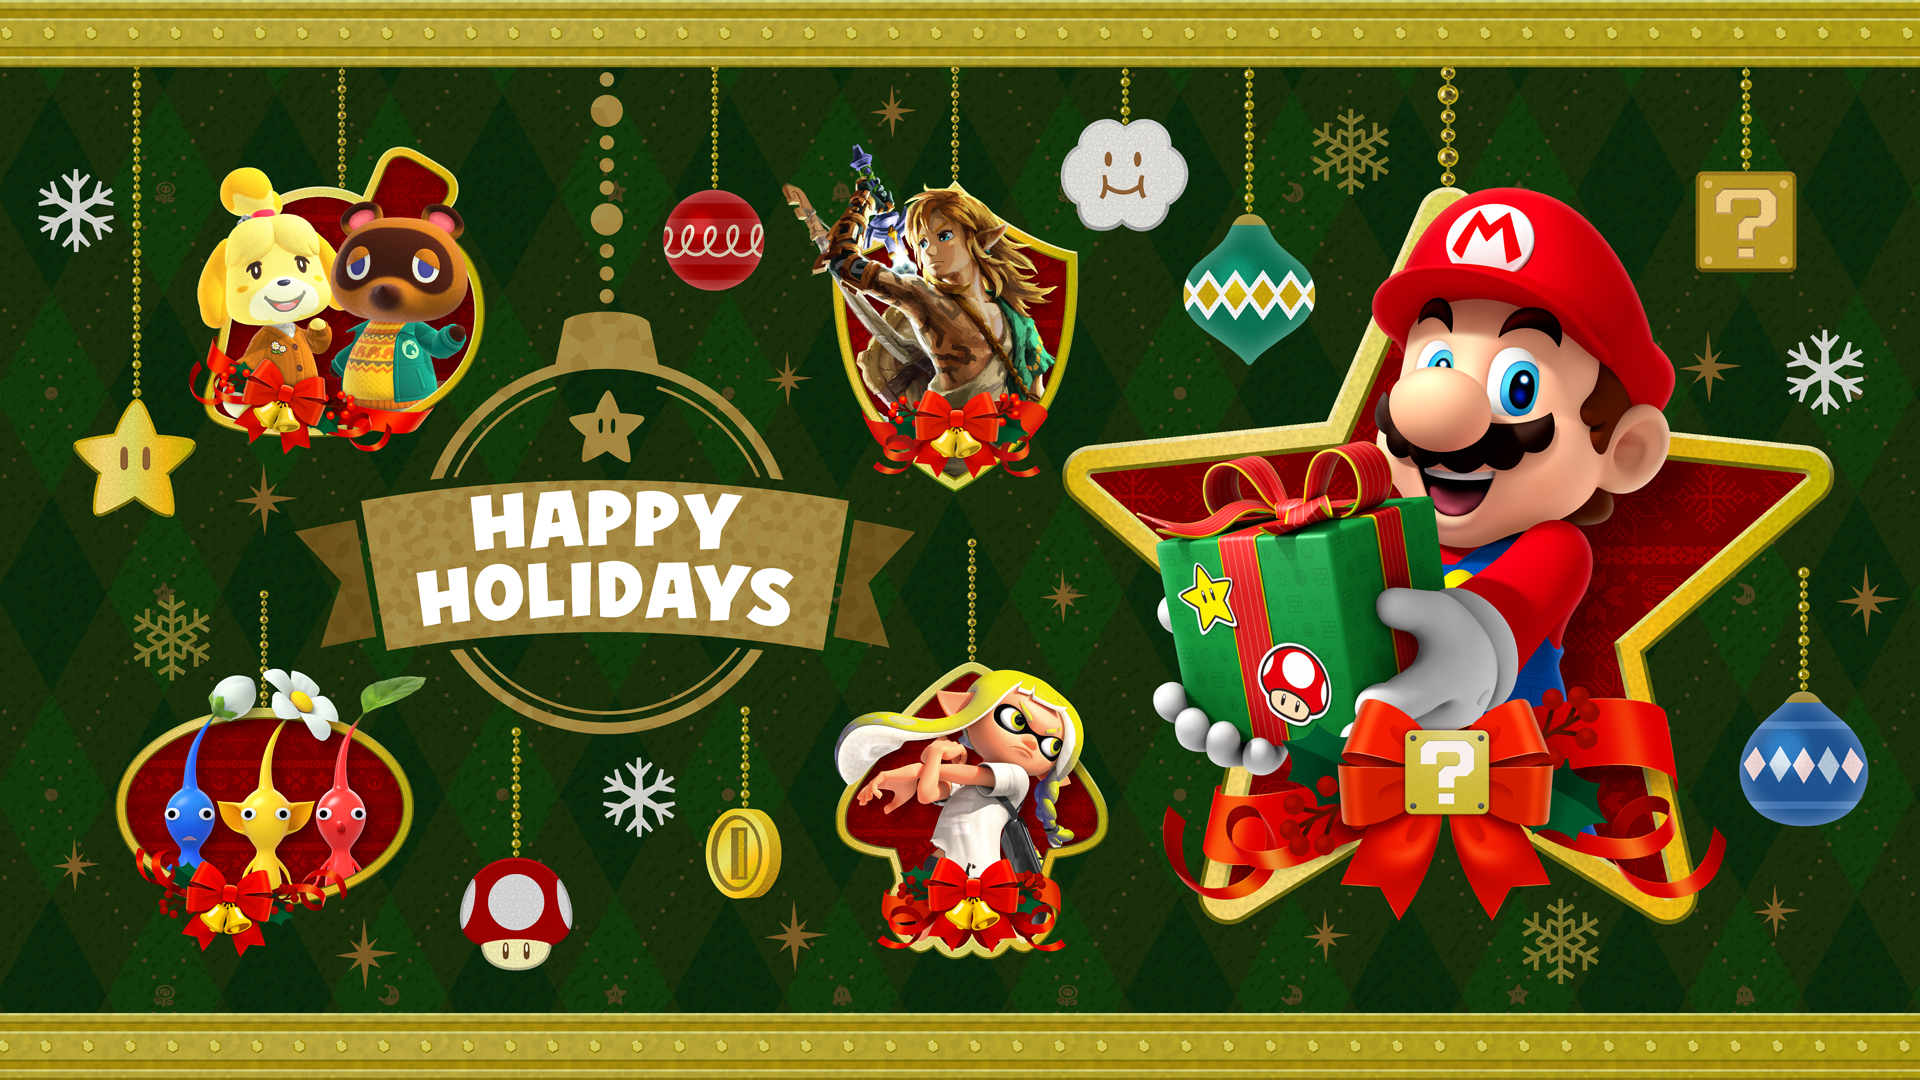

Source: https://cdn-image-f3580964b8e711e5b95f2ff191a1c838.baas.nintendo.com/1/14142f710a23e9b1